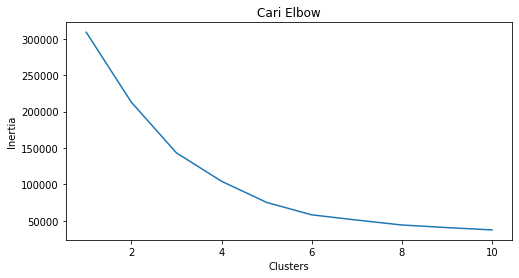

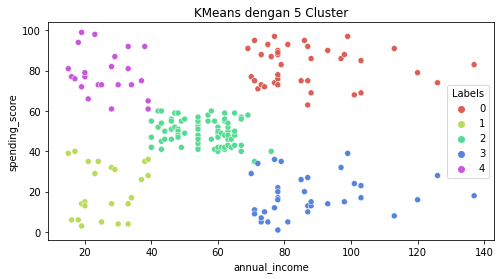

In [23]:
#import csv using pandas
import pandas as pd
dataframe = pd.read_csv('Mall_Customers.csv')
# dataframe.info()
dataframe.head(3) #3 baris pertama

#rename column
dataframe = dataframe.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#replace column to numerik
dataframe['gender'].replace(['Female','Male'], [0,1], inplace=True)
dataframe.head(3)

#drop id dan gender
X = dataframe.drop(['CustomerID','gender'], axis=1)

#import k-means
from sklearn.cluster import KMeans
#membuat list inertia
kluster = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  kluster.append(km.inertia_)

#####membuat plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=kluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#####Melatih K-Means
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()